In [2]:
from projection_utils import *
import pickle
import matplotlib.pyplot as plt
import open3d_vis_utils as V
import cv2
import torch

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
img = plt.imread("./data/image/0038.png")
pcd = np.load("./data/pcd/0038.npy")
with open("./data/pred_dict_3D/0038_pred_dict.pickle", 'rb') as handle:
    pred_dict_3D = pickle.load(handle)
    boxes_3D = pred_dict_3D["pred_boxes"]
    scores_3D = pred_dict_3D["pred_scores"]
    labels_3D = pred_dict_3D["pred_labels"]
with open("./data/pred_dict_2D/0038_pred_dict_2D.pickle", 'rb') as handle:
    pred_dict_2D = pickle.load(handle)
    boxes_2D = pred_dict_2D["boxes"]
    scores_2D = pred_dict_2D["scores"]
    classes_2D = pred_dict_2D["classes"]

In [3]:
boxes_2D

array([[ 601.7733 ,  499.3728 ,  672.74225,  535.5947 ],
       [ 249.68852,  494.4106 ,  298.2574 ,  526.0343 ],
       [ 904.0054 ,  472.43103, 1078.1804 ,  561.80304]], dtype=float32)

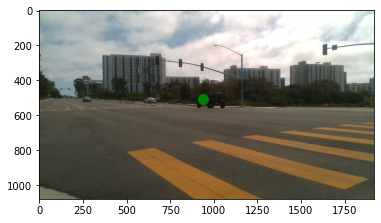

In [4]:
plt.imshow(img)
plt.plot(940.09527588, 507.89971924, "og", markersize=10)

In [5]:
boxes_3D[4:5]
boxes_3D[:6]

tensor([[ 12.0305,  12.3317,  -0.2406,   4.2214,   1.6851,   1.5094,   2.6132],
        [ 40.7842,  -8.5878,   0.4647,   3.8367,   1.6026,   1.4607,   2.6140],
        [ 28.8681,   2.7534,   0.5071,   4.0162,   1.6076,   1.5282,   1.6533],
        [ 46.2989,   6.2338,   0.8187,   4.2639,   1.6388,   1.5250,   1.6065],
        [ 31.3598,  -0.1179,   0.5201,   3.9506,   1.6822,   1.5831,   2.8671],
        [ 26.3526, -27.1608,   0.2741,   4.1263,   1.6747,   1.6123,   5.7913]])

In [6]:
# V.draw_scenes(pcd, ref_boxes=boxes_3D[4:5])

In [7]:
box_1 = boxes_3D[4:5]
lidar2CameraOurs(box_1[:, [1, 2, 0]])

array([[940.09527588, 507.89971924]])

In [3]:
import pickle
with open("/home/yucheng/storage/data/0721/test_gilman_04/3D_boxes_filtered/0022.pickle", 'rb') as handle:
    pred_dict_3D = pickle.load(handle)
    boxes_3D = pred_dict_3D["pred_boxes"]
    scores_3D = pred_dict_3D["pred_scores"]
    labels_3D = pred_dict_3D["pred_labels"]
pcd = np.load("/home/yucheng/storage/data/0721/test_gilman_04/points/0022.npy")
print(boxes_3D)

[tensor([27.3248,  0.4442, -0.3229,  3.2550,  1.4848,  1.3936,  1.3822]), tensor([17.6848, -3.7154, -0.2038,  4.3339,  1.6955,  1.6678,  6.8623]), tensor([29.1832, 11.9179,  0.5341,  4.1505,  1.5900,  1.4922,  1.4832])]


In [4]:
print(scores_3D)

[tensor(0.3831), tensor(0.2964), tensor(0.2700)]


In [5]:
# V.draw_scenes(pcd, ref_boxes=boxes_3D)
a = boxes_3D[0]
a = a[None,:]
a

tensor([[27.3248,  0.4442, -0.3229,  3.2550,  1.4848,  1.3936,  1.3822]])

In [6]:
a = boxes_3D[0][None,:]
for i in range(1, len(boxes_3D)):
    b = boxes_3D[i][None,:]
    a = torch.cat([a,b], dim=0)
a
boxes = a

In [7]:
V.draw_scenes(pcd, ref_boxes=boxes)